# Introduction


## Load the path to the files

In [289]:

import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation


def get_path(num: int):
    return f"/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData new/endsong_{num}.json"
    # return f"file:/data/MyData 3/endsong_{num}.json"


path_list = []
print(type(path_list))
for i in range(0, 10):
    path_list.insert(i, get_path(i))


<class 'list'>


## Load the data

In [290]:

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType, LongType, BooleanType

spotify_schema = StructType(fields=[
    StructField("ts", DateType()),
    StructField("username", StringType()),
    StructField("platform", StringType()),
    StructField("ms_played", LongType()),
    StructField("ip_addr_decrypted", StringType()),
    StructField("user_agent_decrypted", StringType()),
    StructField("master_metadata_track_name", StringType()),
    StructField("master_metadata_album_artist_name", StringType()),
    StructField("master_metadata_album_album_name", StringType()),
    StructField("episode_name", StringType()),
    StructField("episode_show_name", StringType()),
    StructField("spotify_episode_uri", StringType()),
    StructField("reason_start", StringType()),
    StructField("reason_end", StringType()),
    StructField("shuffle", BooleanType()),
    StructField("skipped", StringType()),
    StructField("offline", DoubleType()),
    StructField("offline_timestamp", StringType()),
    StructField("incognito_mode", DoubleType())
])

spark = SparkSession.builder.appName("Spotify-data").getOrCreate()

df = spark.read \
    .option("multiline", "true") \
    .json(path_list)


## Count the number of entries

In [291]:
# df.printSchema()
print(df.select("ts").count())

162484


## Convert into correct timestamp

In [292]:
from pyspark.sql.functions import to_timestamp

df = df.withColumn("time", to_timestamp("ts"))

## Collect the data by years, months and hours

In [293]:
from pyspark.sql.functions import month, hour, year

years = df.groupby(year('time')).count().collect()
months = df.groupby(month('time')).count().collect()
hours = df.groupby(hour('time')).count().collect()

## Graph number of songs listened by years
**Note;** *I did not use spotify fro 2015 to 2018, resulting in no streaming data from those years*

Text(0.5, 1.0, 'Listening by years (amount)')

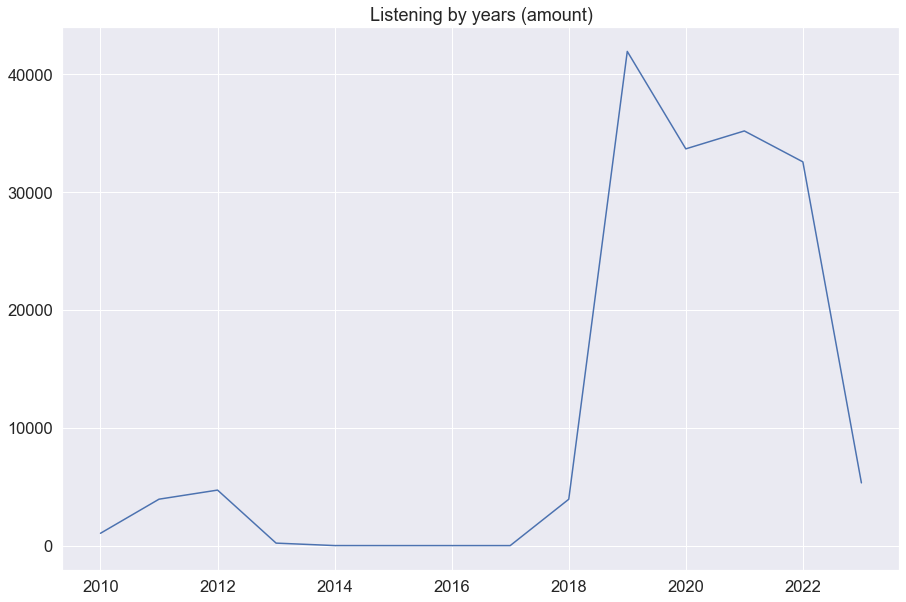

In [294]:
import matplotlib.pyplot as plt

yrs = dict(years)
for i in range(2015, 2018):
    yrs[i] = 0

yrs = dict(sorted(yrs.items()))
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(yrs.keys(), yrs.values())
ax.set_title("Listening by years (amount)")


## Graph number of songs by months - all years

Text(0.5, 1.0, 'Monthly listening')

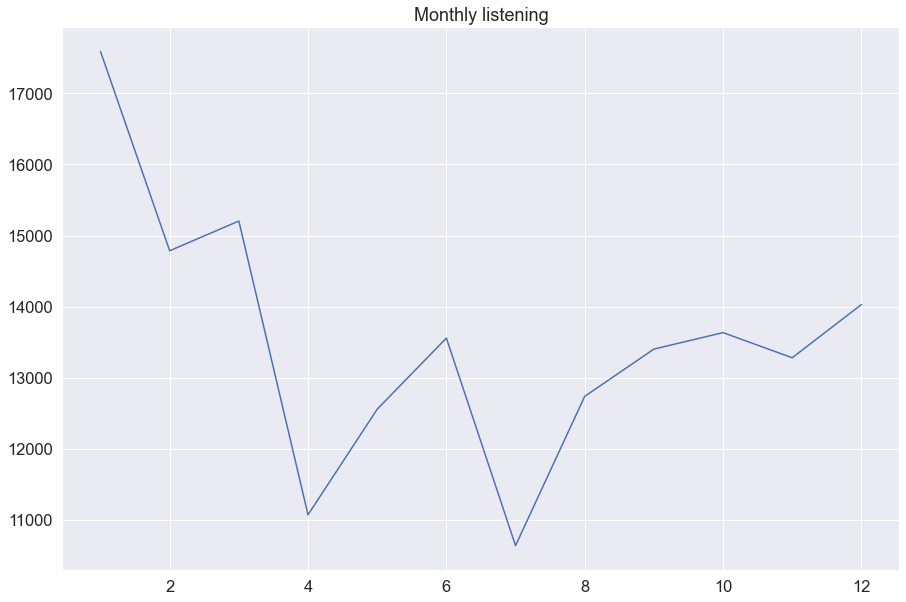

In [295]:
import matplotlib.pyplot as plt

tmp = dict(months)
tmp = dict(sorted(tmp.items()))

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(tmp.keys(), tmp.values())
ax.set_title("Monthly listening")


## Graph number of songs listened by hours - all years

Text(0.5, 1.0, 'Hourly listening')

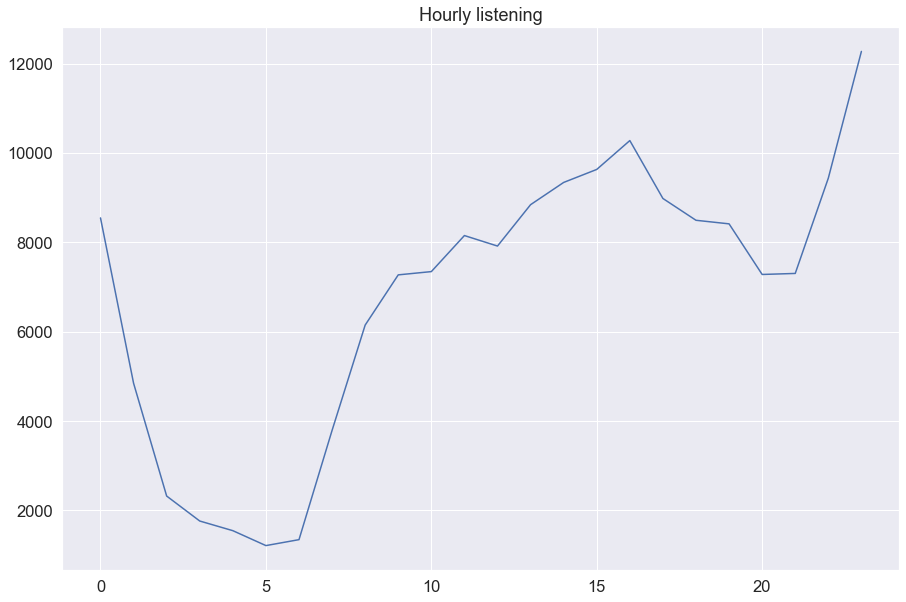

In [296]:
import matplotlib.pyplot as plt

tmp = dict(hours)
tmp = dict(sorted(tmp.items()))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(tmp.keys(), tmp.values())
ax.set_title("Hourly listening")


### Define help methods and variables

In [297]:
months_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August",
               9: "September", 10: "October", 11: "November", 12: "December"}

In [298]:
def dict_num_to_months(input_dict):
    new_dict = {}
    for i in range(1, 13):
        try:
            new_dict[months_dict[i]] = input_dict[i]
        except KeyError as e:
            new_dict[months_dict[i]] = 0
    return new_dict

In [299]:
colormap = plt.cm.gist_ncar  #nipy_spectral, Set1,Paired

## Graph amount monthly listening - year by year

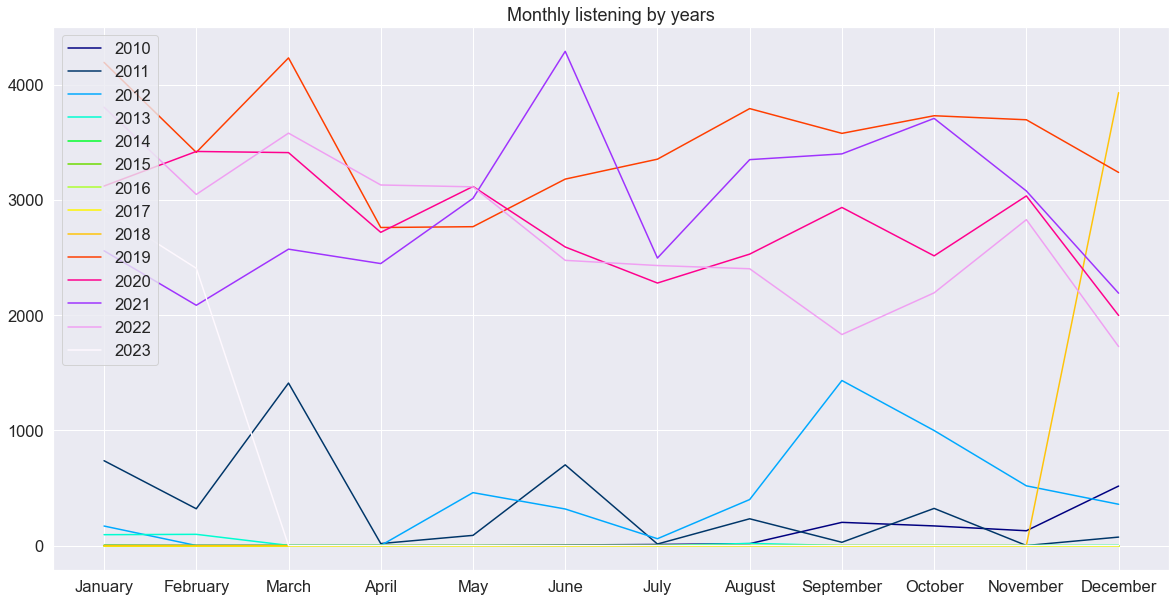

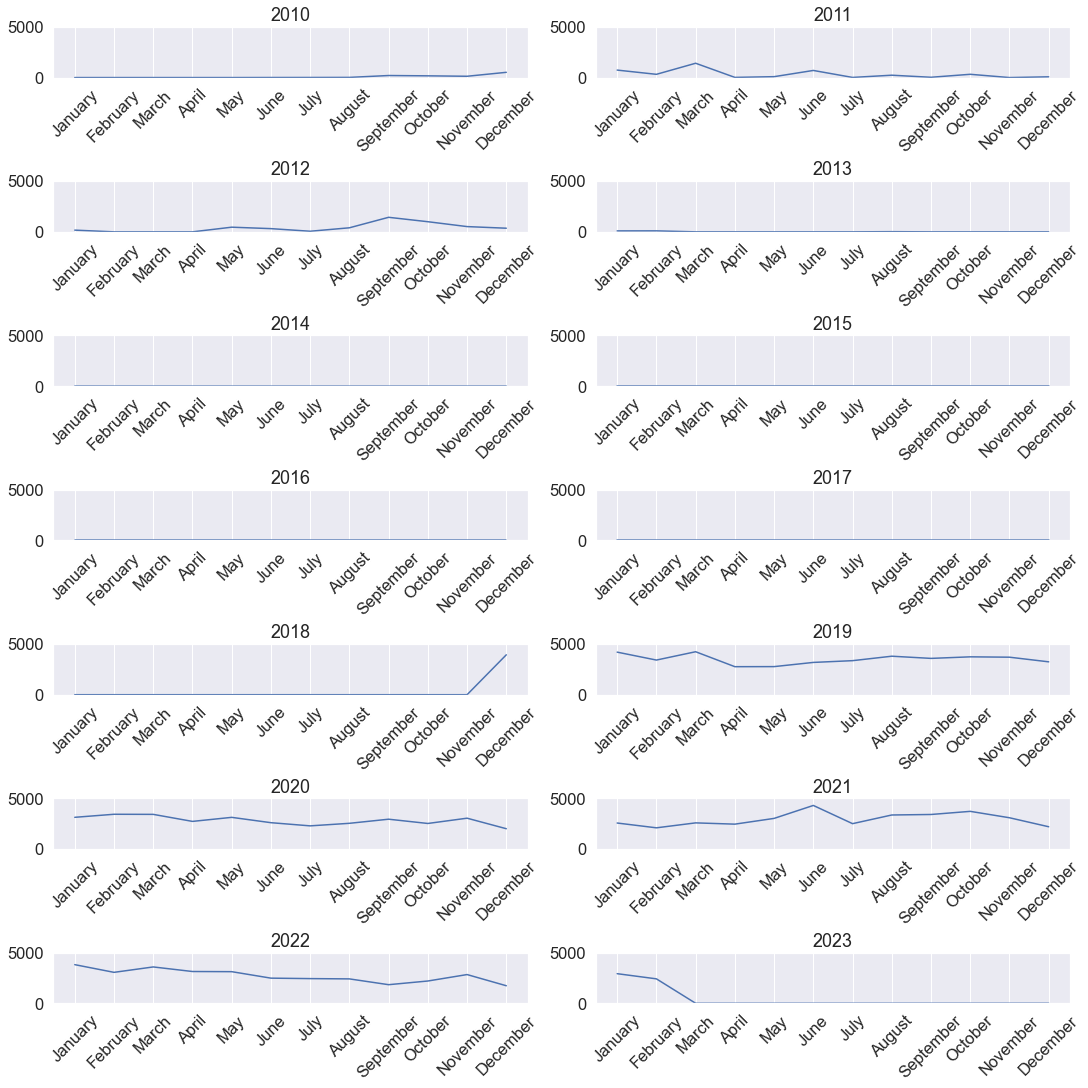

In [300]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Monthly listening by years")

fig2, ax2 = plt.subplots(nrows=7, ncols=2, figsize=(15, 15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1, len(yrs))]
for yr in yrs:
    tmp = df.where(year('time') == yr).groupby(month('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))
    tmp = dict_num_to_months(tmp)
    ax.plot(tmp.keys(), tmp.values(), label=str(yr), color=colors[yr - list(yrs)[0]])

    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(str(yr))
    ax2[j][i].tick_params(axis='x', labelrotation=45)
    ax2[j][i].set_ylim([0, 5000])

    if (i + 1) % 2 == 0:
        j += 1
        i = 0
    else:
        i += 1

ax.legend(loc='upper left')
plt.show()

## Graph amount hourly listening - year by year

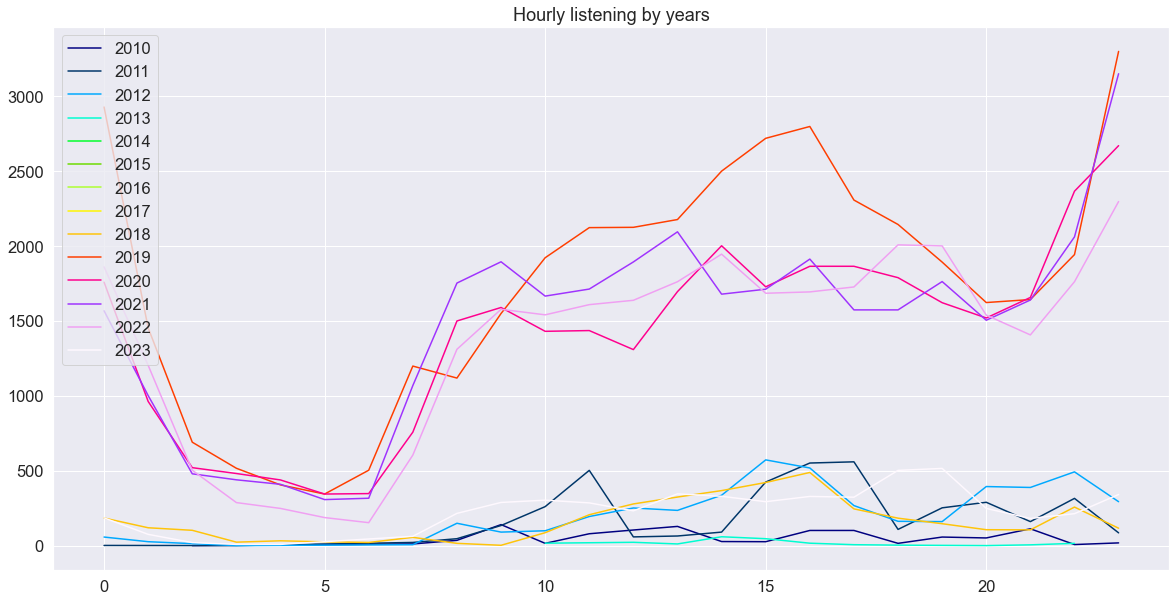

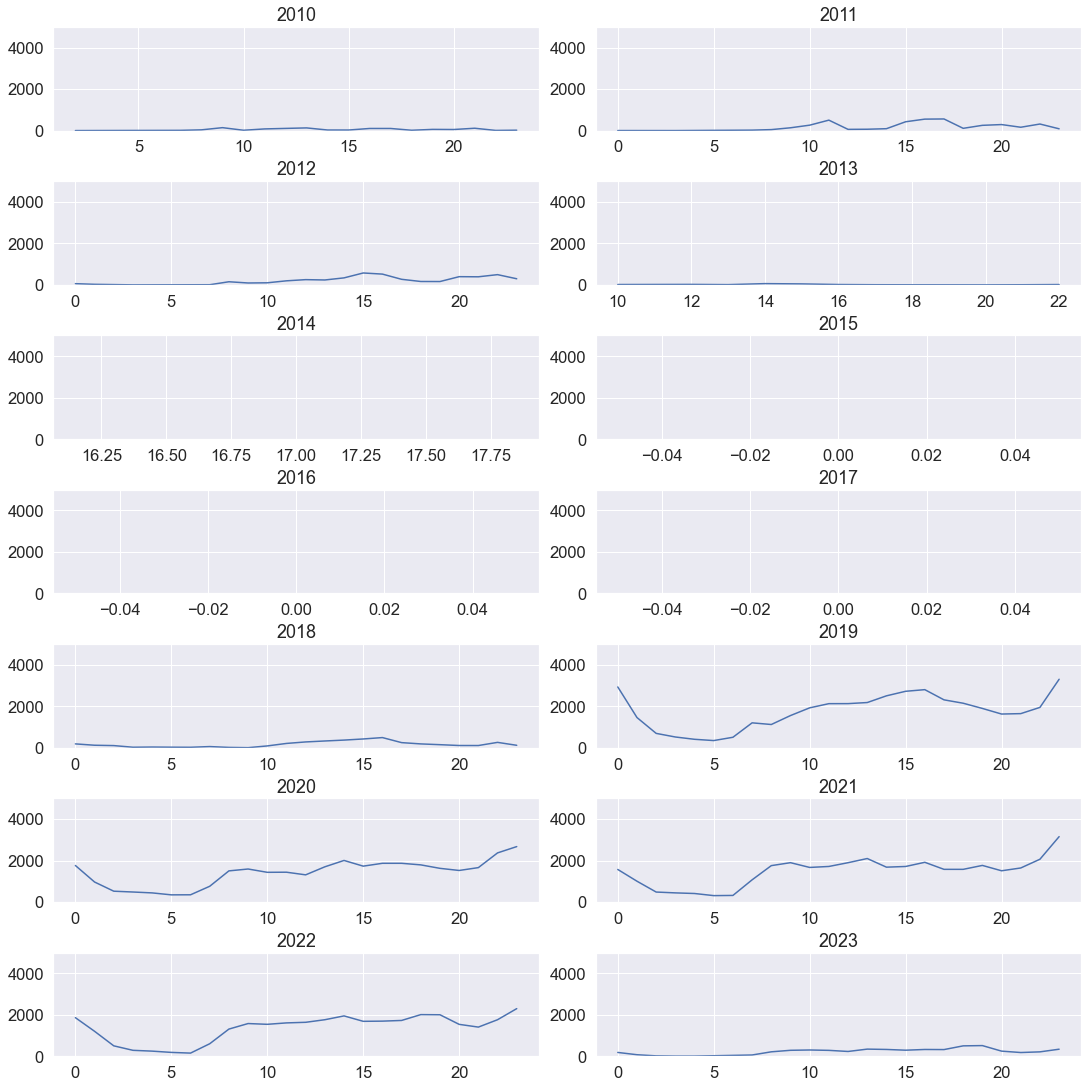

In [301]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Hourly listening by years")

fig2, ax2 = plt.subplots(nrows=7, ncols=2, figsize=(15, 15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1, len(yrs))]
for yr in yrs:
    tmp = df.where(year('time') == yr).groupby(hour('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))

    ax.plot(tmp.keys(), tmp.values(), label=str(yr), color=colors[yr - list(yrs)[0]])

    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(str(yr))
    ax2[j][i].set_ylim([0, 5000])

    if (i + 1) % 2 == 0:
        j += 1
        i = 0
    else:
        i += 1

ax.legend()
plt.show()

## Graph amount hourly listening by months - all years

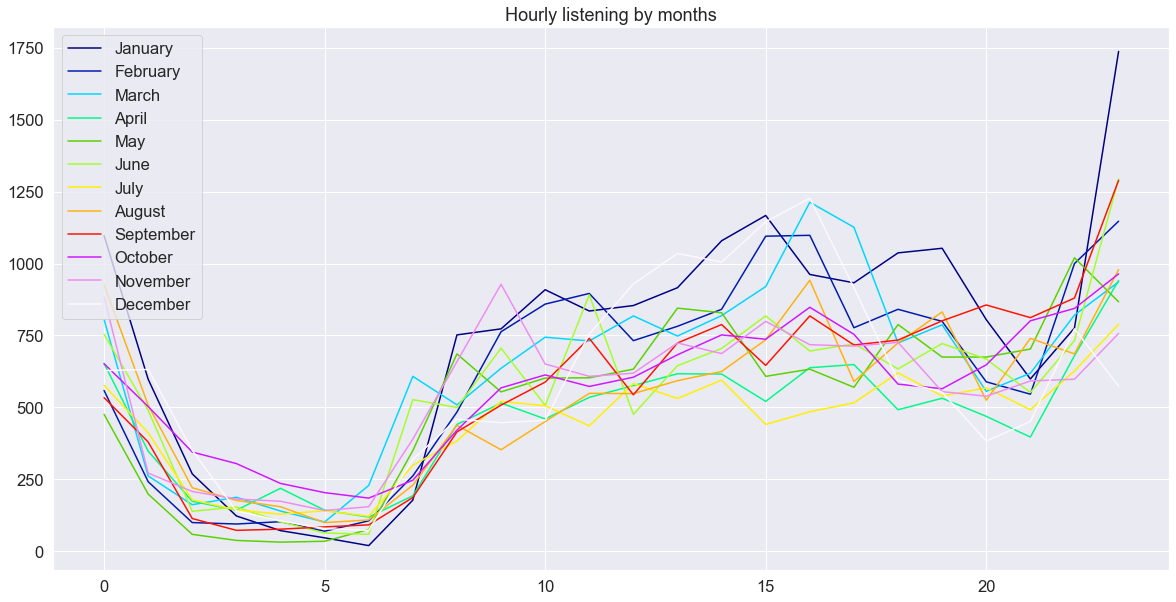

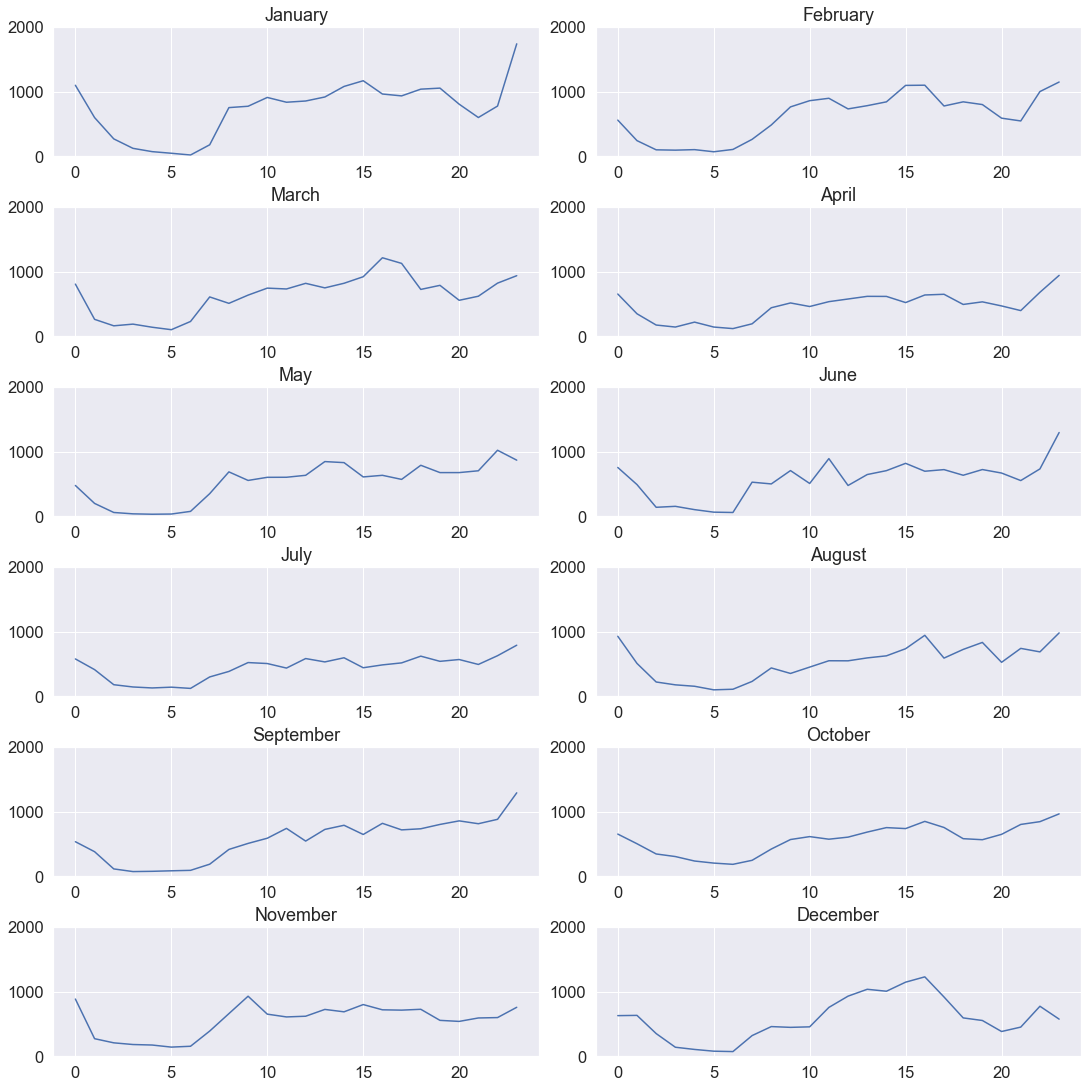

In [302]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Hourly listening by months")

fig2, ax2 = plt.subplots(nrows=6, ncols=2, figsize=(15, 15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1, len(months_dict))]
for mnth in months_dict:
    tmp = df.where(month('time') == mnth).groupby(hour('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))

    ax.plot(tmp.keys(), tmp.values(), label=months_dict[mnth], color=colors[mnth - 1])

    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(months_dict[mnth])
    ax2[j][i].set_ylim([0, 2000])

    if (i + 1) % 2 == 0:
        j += 1
        i = 0
    else:
        i += 1

ax.legend()
plt.show()

In [303]:
from pyspark.sql.functions import col

df.where(year('time') == 2022).limit(100000).toPandas()


# It seems like we got all null values after 2022-10-14

,conn_country,episode_name,episode_show_name,incognito_mode,ip_addr_decrypted,master_metadata_album_album_name,master_metadata_album_artist_name,master_metadata_track_name,ms_played,offline,...,reason_end,reason_start,shuffle,skipped,spotify_episode_uri,spotify_track_uri,ts,user_agent_decrypted,username,time
0,NO,None,None,False,212.251.212.179,Axis: Bold As Love,Jimi Hendrix,Little Wing,145746,False,...,trackdone,trackdone,False,None,None,spotify:track:1Eolhana7nKHYpcYpdVcT5,2022-02-04T13:37:43Z,unknown,mads12,2022-02-04 14:37:43
1,IT,None,None,False,93.34.82.68,None,None,None,197213,False,...,trackdone,trackdone,False,False,None,None,2022-10-22T19:31:38Z,unknown,mads12,2022-10-22 21:31:38
2,NO,None,None,False,213.52.116.74,Magnetica,Quantic,Painting Silhouettes,48185,False,...,fwdbtn,trackdone,False,None,None,spotify:track:32HnpHOQjhWREkRYXVTUYc,2022-07-05T06:57:21Z,unknown,mads12,2022-07-05 08:57:21
3,IT,None,None,False,93.34.83.12,None,None,None,166033,False,...,trackdone,trackdone,False,False,None,None,2022-11-24T19:02:06Z,unknown,mads12,2022-11-24 20:02:06
4,IT,None,None,False,93.34.83.12,None,None,None,80832,False,...,fwdbtn,fwdbtn,False,True,None,None,2022-11-24T10:31:12Z,unknown,mads12,2022-11-24 11:31:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,NO,None,None,False,212.251.212.179,Women In Music Pt III,HAIM,Summer Girl - Bonus Track,205050,False,...,trackdone,trackdone,False,None,None,spotify:track:4O3ob7NxMcZLgJ8ucIahPS,2022-01-27T19:57:24Z,63045703,mads12,2022-01-27 20:57:24
32554,NO,None,None,False,46.9.74.6,Heisann Montebello,Karpe,Hvite menn som pusher 50,1764,False,...,fwdbtn,fwdbtn,False,None,None,spotify:track:5XbtI5DR1e0OcvMbz531IP,2022-03-13T18:13:25Z,unknown,mads12,2022-03-13 19:13:25
32555,IT,None,None,False,93.70.84.255,Sirens,Nicolas Jaar,Killing Time,45720,False,...,endplay,clickrow,False,None,None,spotify:track:5ROPagjJsvBXNcy0f4Sa7R,2022-08-19T22:47:06Z,unknown,mads12,2022-08-20 00:47:06
32556,IT,None,None,False,93.34.83.12,None,None,None,33496,False,...,endplay,trackdone,False,True,None,None,2022-11-16T17:08:19Z,unknown,mads12,2022-11-16 18:08:19


## Count number of songs listened by artist - all years

In [304]:
df.groupby("master_metadata_album_artist_name") \
    .count() \
    .orderBy(col("count").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_album_artist_name,count
0,None,11550
1,$uicideboy$,6919
2,Tame Impala,5478
3,Pink Floyd,3765
4,Arctic Monkeys,3377
5,Kanye West,3336
6,Travis Scott,3064
7,Joji,2591
8,"Tyler, The Creator",2201
9,Twenty One Pilots,2118


## Count minutes listened by artist - all years


In [305]:
df.groupby("master_metadata_album_artist_name") \
    .sum("ms_played") \
    .withColumn("m_played", col("sum(ms_played)") / (60 * 1000)) \
    .orderBy(col("m_played").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_album_artist_name,sum(ms_played),m_played
0,None,2109657825,35160.963750
1,Tame Impala,1173549966,19559.166100
2,Pink Floyd,872396126,14539.935433
3,$uicideboy$,849128330,14152.138833
4,Arctic Monkeys,566256923,9437.615383
5,Kanye West,566215571,9436.926183
6,Travis Scott,553799332,9229.988867
7,Joji,399547958,6659.132633
8,Twenty One Pilots,392223529,6537.058817
9,Interpol,383225792,6387.096533


## Count number of songs listened by artist - 2022

In [306]:
df.where(year('time') == 2022) \
    .groupby("master_metadata_album_artist_name") \
    .count() \
    .orderBy(col("count").desc()) \
    .limit(50) \
    .toPandas()


,master_metadata_album_artist_name,count
0,None,5695
1,Arctic Monkeys,1575
2,Frank Ocean,866
3,Madvillain,777
4,"Tyler, The Creator",724
5,Phoebe Bridgers,602
6,Jeff Rosenstock,596
7,Tame Impala,590
8,Travis Scott,518
9,Car Seat Headrest,515


## Count minutes listened by artist - 2022

In [307]:
df.where(year('time') == 2022) \
    .groupby("master_metadata_album_artist_name") \
    .sum("ms_played") \
    .withColumn("m_played", col("sum(ms_played)") / (60 * 1000)) \
    .orderBy(col("m_played").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_album_artist_name,sum(ms_played),m_played
0,None,959185142,15986.419033
1,Arctic Monkeys,277312204,4621.870067
2,Frank Ocean,179886666,2998.111100
3,Car Seat Headrest,148166692,2469.444867
4,Tame Impala,143207387,2386.789783
5,Phoebe Bridgers,123027705,2050.461750
6,"Tyler, The Creator",120541949,2009.032483
7,Kendrick Lamar,104367002,1739.450033
8,Interpol,102290148,1704.835800
9,Travis Scott,97517254,1625.287567


## Count amount of songs listened - all years

In [308]:
df.groupby("master_metadata_track_name") \
    .count() \
    .orderBy(col("count").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_track_name,count
0,None,11550
1,"New Person, Same Old Mistakes",391
2,Let It Happen,328
3,Kill Yourself (Part III),296
4,The Less I Know The Better,275
5,122 Days,250
6,Eventually,220
7,Carrollton,218
8,90210 (feat. Kacy Hill),215
9,Paris,210


## Count minutes listened by song - all years

In [309]:
df.groupby("master_metadata_track_name") \
    .sum("ms_played") \
    .withColumn("m_played", col("sum(ms_played)") / (60 * 1000)) \
    .orderBy(col("m_played").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_track_name,sum(ms_played),m_played
0,None,2109657825,35160.963750
1,"New Person, Same Old Mistakes",118145728,1969.095467
2,Let It Happen,109004770,1816.746167
3,I No Longer Fear The Razor Guarding My Heel (IV),62623763,1043.729383
4,Atom Heart Mother Suite - 2011 Remaster,56855876,947.597933
5,90210 (feat. Kacy Hill),56849297,947.488283
6,Eventually,52133684,868.894733
7,The Less I Know The Better,46221253,770.354217
8,The art of dying,41227170,687.119500
9,Pyramids,41057929,684.298817


## Count amount of songs listened - 2022

In [310]:
df.where(year('time') == 2022) \
    .groupby("master_metadata_track_name") \
    .count() \
    .orderBy(col("count").desc()) \
    .limit(50) \
    .toPandas()


,master_metadata_track_name,count
0,None,5695
1,Crying Lightning,112
2,My Propeller,100
3,Devil's Advocate,98
4,Sober to Death,86
5,Pyramids,84
6,"New Person, Same Old Mistakes",83
7,Rocky's Late Night,76
8,505,68
9,Mardy Bum,66


## Count minutes listened by song - 2022

In [311]:
df.where(year('time') == 2022) \
    .groupby("master_metadata_track_name") \
    .sum("ms_played") \
    .withColumn("m_played", col("sum(ms_played)") / (60 * 1000)) \
    .orderBy(col("m_played").desc()) \
    .limit(50) \
    .toPandas()

,master_metadata_track_name,sum(ms_played),m_played
0,None,959185142,15986.419033
1,Pyramids,39872089,664.534817
2,Beach Life-In-Death,34833187,580.553117
3,"New Person, Same Old Mistakes",26229981,437.166350
4,Crying Lightning,23015072,383.584533
5,Sober to Death,19957767,332.629450
6,Rocky's Late Night,16728496,278.808267
7,Devil's Advocate,16705547,278.425783
8,Drunk Drivers/Killer Whales,16467001,274.450017
9,My Propeller,16430391,273.839850


## Count the amount of null values based on year

In [312]:

df.where(col("master_metadata_track_name").isNull()) \
    .where(col("episode_name").isNull()) \
    .groupby(year('time')) \
    .count() \
    .toPandas()

,year(time),count
0,2023,5320
1,2022,5652
2,2011,366
3,2012,6
4,2019,1


## Count amount of streams of podcasts

In [313]:
df.where(col("episode_show_name").isNotNull()) \
    .groupBy(col("episode_show_name")) \
    .count() \
    .orderBy(col("count").desc()) \
    .toPandas()

,episode_show_name,count
0,Tid er penger - En podcast med Peter Warren,86
1,Friminutt med Herman og Mikkel,53
2,Radioresepsjonen,16
3,ti catarina,12
4,Morgenkaffen med Finansavisen,8
5,Dynga,5
6,The Casual Arson Radio Hour,4
7,In Good Company with Nicolai Tangen,4
8,HARDtalk,2
9,Brain Talk,2


## Count amount listened to podcasts

In [314]:
df.where(col("episode_show_name").isNotNull()) \
    .groupBy(col("episode_show_name")) \
    .sum("ms_played") \
    .withColumn("m_played", col("sum(ms_played)") / (60 * 1000)) \
    .orderBy(col("m_played").desc()) \
    .toPandas()

,episode_show_name,sum(ms_played),m_played
0,Tid er penger - En podcast med Peter Warren,216681273,3611.354550
1,Friminutt med Herman og Mikkel,54413413,906.890217
2,Radioresepsjonen,28851400,480.856667
3,Dynga,10228242,170.470700
4,In Good Company with Nicolai Tangen,3017714,50.295233
5,Konspirasjonspodden,2920368,48.672800
6,Toppmøtet,2356220,39.270333
7,ti catarina,2353115,39.218583
8,Brain Talk,1608840,26.814000
9,HARDtalk,1395189,23.253150


## Remove everything related to podcasts and create two new columns of month and time


In [315]:
trimmed = df.drop(col("episode_name")).drop(col("episode_show_name")).drop(col("spotify_episode_uri")).drop(col("ts"))
trimmed = trimmed.withColumn('month', month(col("time"))).withColumn('hour', hour(col("time"))).drop(col("time"))
trimmed = trimmed.where(col("spotify_track_uri").isNotNull())
trimmed.toPandas()



,conn_country,incognito_mode,ip_addr_decrypted,master_metadata_album_album_name,master_metadata_album_artist_name,master_metadata_track_name,ms_played,offline,offline_timestamp,platform,reason_end,reason_start,shuffle,skipped,spotify_track_uri,user_agent_decrypted,username,month,hour
0,NO,False,81.191.157.3,Éjszakai,Vas Bela,Éjszakai,152000,False,1.572925e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",trackdone,trackdone,True,None,spotify:track:2qHGPanT2ux9hwZDbmPr8t,unknown,mads12,11,4
1,NO,False,81.191.157.3,Jul i svingen,Odd Nordstoga,Jolevise,2030,False,1.576613e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",backbtn,backbtn,False,None,spotify:track:3acaDSqgRjQNDkwSnRAG6v,unknown,mads12,12,21
2,NO,False,92.221.232.31,Vario,Savant,Stormtrooper - Original Mix,0,False,1.544782e+12,"Android OS 8.1.0 API 27 (HUAWEI, CLT-L29)",fwdbtn,fwdbtn,True,None,spotify:track:0t7vqO6Df38qM1wroZkZ3p,unknown,mads12,12,11
3,NO,False,77.16.219.165,Metallica,Metallica,The God That Failed,308533,False,1.591864e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",trackdone,trackdone,False,None,spotify:track:7tyc1pcOE4FOVIQTBzvxeF,unknown,mads12,6,10
4,NO,False,77.18.63.173,Just As I Am,Bill Withers,Ain't No Sunshine,125093,False,1.596824e+12,"Android OS 10 API 29 (HUAWEI, CLT-L29)",trackdone,trackdone,False,None,spotify:track:1k1Bqnv2R0uJXQN4u6LKYt,unknown,mads12,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150929,NO,False,46.9.74.6,Heisann Montebello,Karpe,Hvite menn som pusher 50,1764,False,1.647195e+12,"iOS 15.3.1 (iPhone12,1)",fwdbtn,fwdbtn,False,None,spotify:track:5XbtI5DR1e0OcvMbz531IP,unknown,mads12,3,19
150930,GB,False,217.144.77.54,Black Holes and Revelations,Muse,Starlight,240213,False,1.624445e+12,Linux [x86-64 0],trackdone,trackdone,False,None,spotify:track:3skn2lauGk7Dx6bVIt5DVj,unknown,mads12,6,12
150931,NO,False,88.89.195.133,Toto,TOTO,Georgy Porgy,247586,False,1.610234e+12,"iOS 14.2 (iPhone12,1)",trackdone,trackdone,False,None,spotify:track:5jQcJ2st6yHWhUBjoDoZPH,unknown,mads12,1,0
150932,IT,False,93.70.84.255,Sirens,Nicolas Jaar,Killing Time,45720,False,1.660949e+12,"iOS 15.6 (iPhone12,1)",endplay,clickrow,False,None,spotify:track:5ROPagjJsvBXNcy0f4Sa7R,unknown,mads12,8,0


## Use the spotify API to collect data of the tracks listened

In [316]:

import time

import pandas as pd
import requests

from pyspark.sql.functions import col
from pyspark.sql import SparkSession


def pre_process_ids(ids: list):
    out = ""
    for s in ids:
        out += s[0].removeprefix("spotify:track:") + ","

    out = out.removesuffix(",")
    return out

In [317]:


def get_access_token():
    client_id = ""
    client_secret = ""
    url = 'https://accounts.spotify.com/api/token'

    ret = requests.post(url, {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
    })
    global access_token
    access_token = ret.json()['access_token']

In [318]:


def get_multiple_features(ids: str):
    url = " https://api.spotify.com/v1/audio-features?ids="
    ret = requests.get(url=url + f'{ids}',
                       headers={"Authorization": f"Bearer {access_token}",
                                },

                       )

    if ret.status_code != 200:
        print(f"Got {ret.text} on multiple features. Retrying in 5 seconds...")
        time.sleep(5)
        return get_multiple_features(ids)

    if len(ids.split(',')) != len(ret.json()['audio_features']):
        print(f"Did not get the same amount on {ids} at multiple features")
        print(ret.json())

    danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature = [], [], [], [], [], [], [], [], [], [], [], []
    for feature in ret.json()['audio_features']:

        if feature is None:
            danceability.append(None)
            energy.append(None)
            key.append(None)
            loudness.append(None)
            mode.append(None)
            speechiness.append(None)
            acousticness.append(None)
            instrumentalness.append(None)
            liveness.append(None)
            valence.append(None)
            tempo.append(None)
            time_signature.append(None)
            continue

        danceability.append(feature['danceability'])
        energy.append(feature['energy'])
        key.append(feature['key'])
        loudness.append(feature['loudness'])
        mode.append(feature['mode'])
        speechiness.append(feature['speechiness'])
        acousticness.append(feature['acousticness'])
        instrumentalness.append(feature['instrumentalness'])
        liveness.append(feature['liveness'])
        valence.append(feature['valence'])
        tempo.append(feature['tempo'])
        time_signature.append(feature['time_signature'])

    return danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature

In [319]:


def get_multiple_tracks(ids: str):
    url = "https://api.spotify.com/v1/tracks?ids=" + f'{ids}'
    ret = requests.get(url=url,
                       headers={"Authorization": f"Bearer {access_token}",
                                },

                       )
    if ret.status_code == 429:
        print(f"Too many requests! Waiting {ret.headers['retry-after']}")
        time.sleep(int(ret.headers['retry-after']))
        get_access_token()
        return get_multiple_tracks(ids)



    elif ret.status_code != 200:
        print(f"Got {ret.text} on multiple tracks. Retrying in 5 seconds...")
        time.sleep(5)
        return get_multiple_tracks(ids)

    if len(ids.split(',')) != len(ret.json()['tracks']):
        print(f"Did not get the same amount on {ids} at multiple tracks")
        print(ret.json())

    popularities, album_ids, album_release_dates, durations = [], [], [], []
    for track in ret.json()['tracks']:
        popularities.append(track['popularity'])
        album_ids.append(track['album']['id'])
        album_release_dates.append(track['album']['release_date'])
        durations.append(track['duration_ms'])

    return popularities, album_ids, album_release_dates, durations

In [320]:


def get_multiple_albums(ids: str):
    url = "https://api.spotify.com/v1/albums?ids="

    ret = requests.get(url=url + f'{ids}',
                       headers={"Authorization": f"Bearer {access_token}",
                                })

    genres = []
    for album in ret.json()['albums']:
        genres.append(album['genres'])

    return genres


In [321]:

def batch_extract(all_ids):
    batch_size = 50

    track_ids, popularities, album_ids, album_release_dates, durations = [], [], [], [], []
    danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature = [], [], [], [], [], [], [], [], [], [], [], []

    for i in range(0, len(all_ids), batch_size):

        curr_ids = all_ids[i:i + batch_size]
        curr_ids = pre_process_ids(curr_ids)
        pop, a_id, a_date, dur = get_multiple_tracks(curr_ids)

        assert len(curr_ids.split(",")) == len(pop) == len(a_id) == len(a_date) == len(dur)

        track_ids += curr_ids.split(",")
        popularities += pop
        album_ids += a_id
        album_release_dates += a_date
        durations += dur

        dan, ene, ke, lou, mod, spe, aco, ins, liv, val, tem, tim = get_multiple_features(curr_ids)
        danceability += dan
        energy += ene
        key += ke
        loudness += lou
        mode += mod
        speechiness += spe
        acousticness += aco
        instrumentalness += ins
        liveness += liv
        valence += val
        tempo += tem
        time_signature += tim

        # TODO: add length check on all in rang
        #  Add track id, remove square brackets of date

        if i % 1000 == 0:
            print(i)

    data = {'all_ids': track_ids,
            'popularities': popularities,
            'album_ids': album_ids,
            'album_release_dates': album_release_dates,
            'durations': durations,
            'danceability': danceability,
            "energy": energy,
            "key": key,
            'loudness': loudness,
            'mode': mode,
            'speechiness': speechiness,
            'acousticness': acousticness,
            'instrumentalness': instrumentalness,
            'liveness': liveness,
            'valence': valence,
            'tempo': tempo,
            'time_signature': time_signature
            }

    df1 = pd.DataFrame(data)
    df1.to_csv("track_data.csv")


In [322]:

def collect_data():
    a = trimmed.select('spotify_track_uri').distinct().collect()
    batch_extract(a)

## Disable the extraction since it already has been done

In [323]:


# global access_token
# access_token = None
# if access_token is None:
#     get_access_token()
#
# collect_data()


## Read the new API data

In [324]:
df2 = spark.read \
    .option("multiline", "true") \
    .option("header", "true") \
    .csv("/Users/madslun/Documents/Programmering/Project work - BDA/track_data.csv")

## Cast new data into correct formats

In [325]:

from pyspark.sql.functions import lpad

df2 = df2.withColumn("popularities", col("popularities").cast("double")) \
    .withColumn("durations", col("durations").cast("double")) \
    .withColumn("all_ids",
                lpad(col("all_ids"), len("spotify:track:") + len("0gPQTLaqHDgdupKEok7J2x"), "spotify:track:")) \
    .withColumn("popularities", col("popularities").cast("double")) \
    .withColumn("durations", col("durations").cast("double")) \
    .withColumn("danceability", col("danceability").cast("double")) \
    .withColumn("energy", col("energy").cast("double")) \
    .withColumn("key", col("key").cast("double")) \
    .withColumn("loudness", col("loudness").cast("double")) \
    .withColumn("mode", col("mode").cast("double")) \
    .withColumn("speechiness", col("speechiness").cast("double")) \
    .withColumn("acousticness", col("acousticness").cast("double")) \
    .withColumn("instrumentalness", col("instrumentalness").cast("double")) \
    .withColumn("liveness", col("liveness").cast("double")) \
    .withColumn("valence", col("valence").cast("double")) \
    .withColumn("tempo", col("tempo").cast("double")) \
    .withColumn("time_signature", col("time_signature").cast("double")) \
    .withColumn("album_release_dates", to_timestamp("album_release_dates", "yyyy-MM-dd"))

In [326]:
df2.toPandas()

,_c0,all_ids,popularities,album_ids,album_release_dates,durations,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,spotify:track:0gPQTLaqHDgdupKEok7J2x,68.0,5TedEgCbtmvDnXzUtXEFJY,2000-08-14,235133.0,0.659,0.812,4.0,-7.499,0.0,0.0487,0.230000,0.000000,0.0951,0.8880,83.014,4.0
1,1,spotify:track:1WhInUeY7uD5E9Kbskepzo,17.0,2QRZ1bxEIic7doYdTiWdjS,2011-02-18,238093.0,0.696,0.708,10.0,-5.740,1.0,0.0390,0.000796,0.000307,0.3980,0.3420,113.987,4.0
2,2,spotify:track:1kqUg7KtyYaaYXa6P5o1no,0.0,65sqJcX1qHjBztviCk7xaK,2019-12-11,162624.0,0.728,0.120,0.0,-21.541,1.0,0.0424,0.974000,0.790000,0.1290,0.2080,68.024,4.0
3,3,spotify:track:0Lhy1sDDdtUFY2pyq2ZVi9,7.0,0sWQFBl9e6A9tL4CqFT9X8,2019-11-05,160000.0,0.773,0.620,9.0,-5.252,1.0,0.1030,0.363000,0.000002,0.1750,0.6240,84.975,4.0
4,4,spotify:track:4bEcoz1OcfMgUbp2ft8ieQ,71.0,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,255653.0,0.480,0.610,0.0,-7.042,1.0,0.3050,0.045600,0.000000,0.3130,0.2970,90.034,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28083,28083,spotify:track:7IXPMjyqY7J3vjCKMQWjIm,35.0,7BuwwZzrJCAJaC12QKkDOh,2011-02-21,206800.0,0.419,0.521,2.0,-10.875,1.0,0.2470,0.036600,0.146000,0.0923,0.3860,141.964,4.0
28084,28084,spotify:track:6R15sXb3qRfJOsIbt1vS2a,49.0,2kUFpooWv9nE15zGLpFcFL,2017-03-31,131904.0,0.811,0.794,11.0,-3.324,0.0,0.0845,0.049100,0.000000,0.2360,0.9700,125.987,4.0
28085,28085,spotify:track:3nyjP2kU2QxCRdnnEcccfH,1.0,1XuIEcctTLJ7RYlChTkBgd,2019-06-21,257142.0,0.602,0.722,4.0,-5.049,0.0,0.2560,0.195000,0.000000,0.1650,0.6230,140.092,4.0
28086,28086,spotify:track:3FL2z2Q0L1XP5S6hV02DxQ,0.0,0FCWZdIpQGpxyglejlCsV4,2017-09-20,142041.0,0.485,0.388,11.0,-10.506,0.0,0.0543,0.058100,0.000247,0.0757,0.0761,124.221,4.0


## Join listening history to track features

In [327]:
df_joined = trimmed.join(df2, trimmed.spotify_track_uri == df2.all_ids)

In [328]:
df_joined.toPandas()

,conn_country,incognito_mode,ip_addr_decrypted,master_metadata_album_album_name,master_metadata_album_artist_name,master_metadata_track_name,ms_played,offline,offline_timestamp,platform,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,NO,False,81.191.157.3,Éjszakai,Vas Bela,Éjszakai,152000,False,1.572925e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",...,10.0,-35.169,1.0,0.0410,0.987000,0.879000,0.116,0.0992,68.220,4.0
1,NO,False,81.191.157.3,Jul i svingen,Odd Nordstoga,Jolevise,2030,False,1.576613e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",...,5.0,-8.687,1.0,0.0324,0.662000,0.000000,0.116,0.2470,186.084,3.0
2,NO,False,92.221.232.31,Vario,Savant,Stormtrooper - Original Mix,0,False,1.544782e+12,"Android OS 8.1.0 API 27 (HUAWEI, CLT-L29)",...,2.0,-9.573,1.0,0.0584,0.000031,0.237000,0.325,0.3490,76.487,4.0
3,NO,False,77.16.219.165,Metallica,Metallica,The God That Failed,308533,False,1.591864e+12,"Android OS 9 API 28 (HUAWEI, CLT-L29)",...,8.0,-6.531,1.0,0.0402,0.000327,0.000276,0.122,0.4400,82.990,4.0
4,NO,False,77.18.63.173,Just As I Am,Bill Withers,Ain't No Sunshine,125093,False,1.596824e+12,"Android OS 10 API 29 (HUAWEI, CLT-L29)",...,4.0,-11.451,0.0,0.1220,0.457000,0.000017,0.117,0.5150,78.169,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150929,NO,False,46.9.74.6,Heisann Montebello,Karpe,Hvite menn som pusher 50,1764,False,1.647195e+12,"iOS 15.3.1 (iPhone12,1)",...,0.0,-5.309,1.0,0.1520,0.109000,0.000005,0.356,0.4800,90.026,4.0
150930,GB,False,217.144.77.54,Black Holes and Revelations,Muse,Starlight,240213,False,1.624445e+12,Linux [x86-64 0],...,4.0,-4.046,1.0,0.0321,0.000436,0.000010,0.206,0.3180,121.610,4.0
150931,NO,False,88.89.195.133,Toto,TOTO,Georgy Porgy,247586,False,1.610234e+12,"iOS 14.2 (iPhone12,1)",...,11.0,-7.703,0.0,0.0847,0.051900,0.021300,0.127,0.9180,97.207,4.0
150932,IT,False,93.70.84.255,Sirens,Nicolas Jaar,Killing Time,45720,False,1.660949e+12,"iOS 15.6 (iPhone12,1)",...,3.0,-19.732,0.0,0.0543,0.574000,0.423000,0.112,0.0427,140.616,3.0


## Verify correct amount and remove null data

In [329]:
print(trimmed.count(), df_joined.count(), df_joined.where(col("key").isNull()).count())
df_joined = df_joined.where(col("key").isNotNull())

150934 150934 11


In [330]:
print(df_joined.count())

150923


Text(0.5, 1.0, 'Album origin years')

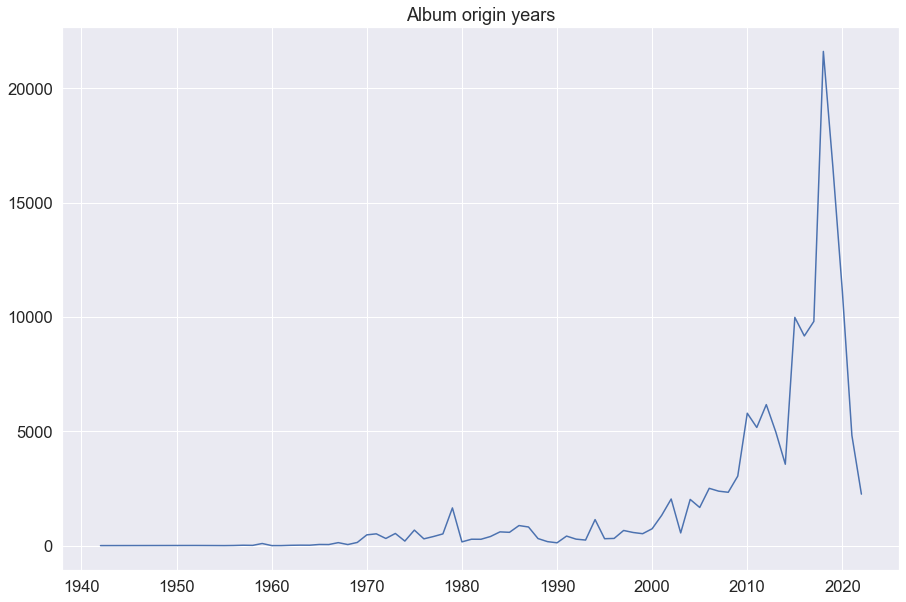

In [331]:
release_date = df_joined.where(col("album_release_dates").isNotNull()).groupby(year("album_release_dates")) \
    .count().collect()

tmp = dict(release_date)
tmp = dict(sorted(tmp.items()))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(tmp.keys(), tmp.values())
ax.set_title("Album origin years")
#Add graphs

## Inspecting some of the new features

In [332]:
df_joined.groupby(col("time_signature")) \
    .count() \
    .toPandas()

,time_signature,count
0,0.0,115
1,1.0,1146
2,4.0,139034
3,3.0,8512
4,5.0,2116


In [333]:
df_joined.groupBy("tempo") \
    .count() \
    .orderBy(col("count").desc()) \
    .toPandas()

,tempo,count
0,151.836,391
1,125.012,358
2,105.977,298
3,116.879,275
4,130.968,242
...,...,...
19185,79.750,1
19186,94.965,1
19187,119.130,1
19188,92.972,1


## One hot encode country

In [334]:
from pyspark.ml.feature import StringIndexer

encoder = StringIndexer(inputCol='conn_country', outputCol='O-Country')
model = encoder.fit(df_joined)
df_joined = model.transform(df_joined)


## Transform features into vector

In [335]:
vector_col = "features"
feature_cols = ['O-Country', 'ms_played', 'popularities',
                # 'album_release_dates',
                'durations', 'danceability',
                'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'time_signature', 'hour', 'month']

assembler = VectorAssembler(
    inputCols=feature_cols, outputCol=vector_col, handleInvalid="skip")

output = assembler.transform(df_joined)


## Look at the correlation between features

In [336]:
processed_data = output.select(vector_col)

<AxesSubplot: >

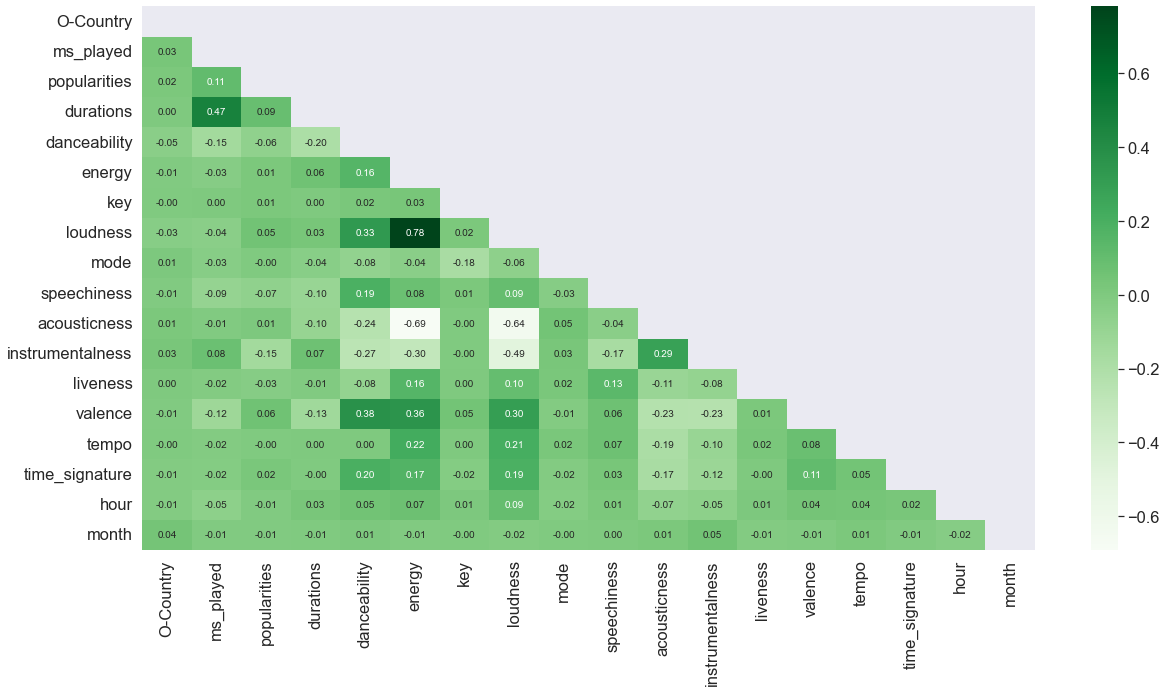

In [337]:
import seaborn as sns

corr_matrix = Correlation.corr(processed_data, vector_col).collect()[0][0].toArray().tolist()
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns=feature_cols, index=feature_cols)

sns.set(font_scale=1.5)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_df,
            mask=mask,
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values, cmap="Greens", annot=True, fmt=".2f", annot_kws={"size": 10})


## Remove hours in order to predict it

In [338]:
feature_cols.remove("hour")

In [339]:
assembler = VectorAssembler(
    inputCols=feature_cols, outputCol=vector_col, handleInvalid="skip")

output = assembler.transform(df_joined)


processed_data = output.select(vector_col, "hour")


In [340]:
train, test = processed_data.randomSplit([0.8, 0.2])


## Let's try to predict when during the day songs has been listened to

In [341]:

from pyspark.ml.classification import LogisticRegression

model = LogisticRegression(labelCol='hour')

learned = model.fit(train)
pred = learned.transform(test)

In [342]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="hour")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 0.48755991292140727


In [343]:
correct_predictions = pred.where(
     (col("hour") == col("prediction"))).count()
total = pred.count()

print("Acc", float(correct_predictions) / float(total))

Acc 0.08215503824629955


In [344]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

model = MultilayerPerceptronClassifier(layers=[len(feature_cols), 20, 25, 30, 35, 30, 25, 24], maxIter=100, labelCol="hour")

learned = model.fit(train)
pred = learned.transform(test)

In [345]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="hour")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 0.47064362654343606


In [346]:
correct_predictions = pred.where(
     (col("hour") == col("prediction"))).count()
total = pred.count()

print("Acc", float(correct_predictions) / float(total))

Acc 0.07728732739494686


In [347]:
from pyspark.ml.classification import RandomForestClassifier

model = RandomForestClassifier(labelCol='hour')

learned = model.fit(train)
pred = learned.transform(test)

In [348]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="hour")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 0.48531566169112483


In [349]:
correct_predictions = pred.where(
    (col("hour") == col("prediction"))).count()
total = pred.count()

print("Acc", float(correct_predictions) / float(total))

Acc 0.09520182787509521


## Add hour, remove month and predict month

In [350]:
feature_cols.append("hour")
feature_cols.remove("month")

In [351]:
assembler = VectorAssembler(
    inputCols=feature_cols, outputCol=vector_col, handleInvalid="skip")

output = assembler.transform(df_joined)


processed_data = output.select(vector_col, "month")

In [352]:
processed_data = output.select(vector_col, 'month')
train, test = processed_data.randomSplit([0.8, 0.2])


In [353]:

from pyspark.ml.classification import LogisticRegression

model = LogisticRegression(labelCol='month')

learned = model.fit(train)
pred = learned.transform(test)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [354]:

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="month")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 1.0


In [355]:

correct_predictions = pred.where(
    (
                col("month") == col("prediction"))).count()
total = pred.count()
print("Acc", float(correct_predictions) / float(total))

Acc 0.12411452670422721


In [356]:

from pyspark.ml.classification import MultilayerPerceptronClassifier

model = MultilayerPerceptronClassifier(layers=[len(feature_cols), 20, 25, 30, 35, 30, 25, 24], maxIter=100,
                                       labelCol="month")

learned = model.fit(train)
pred = learned.transform(test)

In [357]:

from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="month")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 1.0


In [358]:

correct_predictions = pred.where(
     (
                col("month") == col("prediction"))).count()
total = pred.count()
print("Acc", float(correct_predictions) / float(total))

Acc 0.10289611544924385


In [359]:

from pyspark.ml.classification import RandomForestClassifier

model = RandomForestClassifier(labelCol='month')

learned = model.fit(train)
pred = learned.transform(test)

In [360]:

from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluate = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="month")
auc = evaluate.evaluate(pred)
print("Auc", auc)

Auc 1.0


In [361]:

correct_predictions = pred.where( (
                col("month") == col("prediction"))).count()
total = pred.count()

print("Acc", float(correct_predictions) / float(total))


Acc 0.15646930908372048


## It seems like it is hard to predict at what time and which month I am listnening certain music.